In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

* Hyperparameters
1. Input Layer Size->Same shape as number of features
2. Hidden Layer->Problem specific
3. Neuron Per hidden layer->probelm specific
4. Output layer shape->same as desired prediction shape
5. Hidden activation->ReLU
6. Output activation->None,ReLU,Logistic/tanh
7. Loss function->MSE,MAE,Huber
8. Optimizer->SGD,Adam

In [30]:
#introduction to Regression with neural networks in tensorflow
X=np.array([1.,3.,5.,7.,9.,10.,12.,15.,17.,19.,21.,23.,26.,31.])
y=np.array([5.,7.,9.,11.,13.,16.,19.,21.,24.,26.,28.,31.,35.,37.])

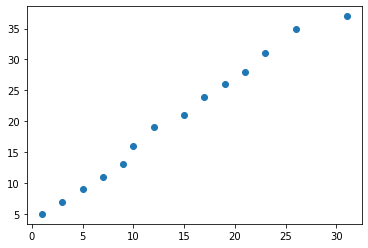

In [31]:
plt.scatter(X,y)

In [32]:
y==X+4

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False])

* Input and Output Shapes

In [33]:
#create a demo tensor for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [34]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((14,), (14,))

In [35]:
#Turn our Numpy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(14,), dtype=float32, numpy=
 array([ 1.,  3.,  5.,  7.,  9., 10., 12., 15., 17., 19., 21., 23., 26.,
        31.], dtype=float32)>,
 <tf.Tensor: shape=(14,), dtype=float32, numpy=
 array([ 5.,  7.,  9., 11., 13., 16., 19., 21., 24., 26., 28., 31., 35.,
        37.], dtype=float32)>)

In [36]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

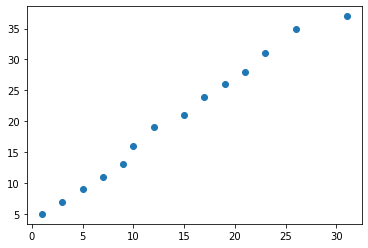

In [37]:
plt.scatter(X,y)

### Steps in modelling with Tensorflow
1. creating a model->define the input and output layers,as well as the hidden layers of a 
    deep learning model.
2. Compiling a model->define the loss function (in other words ,the function which tells 
    our model how wrong it is) and the optimizer (tells our model how to improve the pattern)
    and evaluation mertics (what we can use to interpret the performance of our model).
3. Fitting a model->letting the model try to find patterns between X and y(features and labels)


In [38]:
#Set random seed
tf.random.set_seed(42)

#1.creating a model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 814ms/step - loss: 37.4253 - mae: 37.4253
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 35.3948 - mae: 35.3948
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 33.3644 - mae: 33.3644
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 31.3339 - mae: 31.3339
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 29.3035 - mae: 29.3035


In [39]:
#Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 160ms/step


array([[-8.537318]], dtype=float32)

# Improving our model

* we can improve our model, by altering the steps we took to create a model
1. Creating a model->here we might add more layers,increase the number of hidden units(all
    called neurons) within each of the hidden layers,change the activation function of 
    each layer.
2. Compiling a model->here we might change the optimization function or perhaps the 
    learning rate of the optimization function.
3. Fitting a model->here we might fit a model for more epochs(leave it training for longer),
    or on more data(give the model more examples to learn from)

In [40]:
#1. creating the model(specified to our model)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compiling our model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0003),
    metrics=["mae"]
)

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 20.1243 - mae: 20.1243
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.9162 - mae: 19.9162
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 19.7078 - mae: 19.7078
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4978 - mae: 19.4978
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 19.2891 - mae: 19.2891
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 19.0795 - mae: 19.0795
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 18.8697 - mae: 18.8697
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 18.6612 - mae: 18.6612
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 18.4634 - mae: 18.4634
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 18.2653 - mae: 18.2653
Epoch 11/100
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 7ms/step - loss: 1.5646 - mae: 1.5646
Epoch 89/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4871 - mae: 1.4871
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4852 - mae: 1.4852
Epoch 91/100
1/1 [==============================] - 0s 9ms/step - loss: 1.5044 - mae: 1.5044
Epoch 92/100
1/1 [==============================] - 0s 10ms/step - loss: 1.5261 - mae: 1.5261
Epoch 93/100
1/1 [==============================] - 0s 7ms/step - loss: 1.5421 - mae: 1.5421
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5615 - mae: 1.5615
Epoch 95/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5701 - mae: 1.5701
Epoch 96/100
1/1 [==============================] - 0s 9ms/step - loss: 1.5670 - mae: 1.5670
Epoch 97/100
1/1 [==============================] - 0s 9ms/step - loss: 1.5535 - mae: 1.5535
Epoch 98/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5316 - m

In [41]:
#1. Creating the model
model=tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 691ms/step - loss: 1.9305 - mae: 1.9305
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.7350 - mae: 1.7350
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 1.8770 - mae: 1.8770
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.7784 - mae: 1.7784
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 1.8377 - mae: 1.8377
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 1.7120 - mae: 1.7120
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.7098 - mae: 1.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7075 - mae: 1.7075
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 1.7052 - mae: 1.7052
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.7050 - mae: 1.7050
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 

Epoch 89/100
1/1 [==============================] - 0s 7ms/step - loss: 1.6593 - mae: 1.6593
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 1.6899 - mae: 1.6899
Epoch 91/100
1/1 [==============================] - 0s 9ms/step - loss: 1.5579 - mae: 1.5579
Epoch 92/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5556 - mae: 1.5556
Epoch 93/100
1/1 [==============================] - 0s 7ms/step - loss: 1.5598 - mae: 1.5598
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7752 - mae: 1.7752
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 1.6032 - mae: 1.6032
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7216 - mae: 1.7216
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 1.6465 - mae: 1.6465
Epoch 98/100
1/1 [==============================] - 0s 8ms/step - loss: 1.6782 - mae: 1.6782
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss

* Common ways to improve model
1. Adding layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

# Evaluting a model

* IN practice , a typical workflow you will go through when building neural network is:


Build a model->fit_it->evaluate_it->tweek_a_model->fit_it->evaluate_it->tweek_it->...

>when it comes to evaluation there are 3 words you should memorize:
>"visualize,visualize,visualize"
It's a good idea to visualize:
1.The data->what data are we working with?what does it look like?
2.The model itself->what does our model look like?
3.The training of a model->how does a model perform while it learns
4.The predictions of the model->how do the predictions of a model line up against the
 ground truth(the orginal labels)?

In [42]:
#make a bigger dataset
X=tf.range(-100,100,2)
X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98])>

In [43]:
y=X+3
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-97, -95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75, -73,
       -71, -69, -67, -65, -63, -61, -59, -57, -55, -53, -51, -49, -47,
       -45, -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23, -21,
       -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,
        33,  35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,
        59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,
        85,  87,  89,  91,  93,  95,  97,  99, 101])>

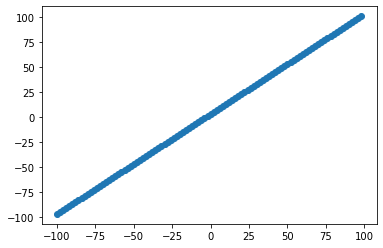

In [44]:
plt.scatter(X,y)

In [45]:
# Splitting our dataset into training and testing data
X_train=X[:80] #80% for training
y_train=y[:80]

X_test=X[80:] #20% for testing
y_test=y[80:] 

len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

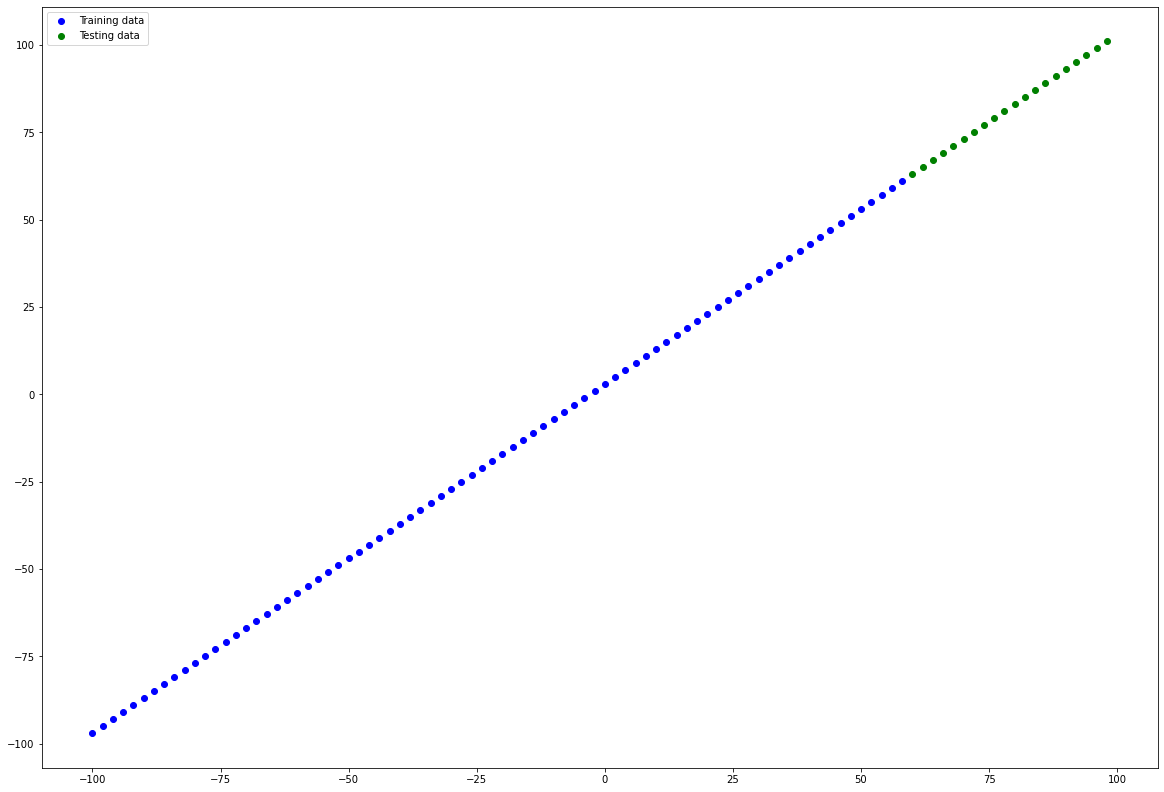

In [46]:
plt.figure(figsize=(20,14))
#plotting training in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#plotting testing in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend()

In [47]:
# Let's have a look at how to build a neural network for our data
 
# 1. Create a model
from statistics import mode


model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])

#2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fitting the model
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=50)

In [48]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [49]:
# Let's create a model that automatically builds after providing input shape

tf.random.set_seed(42)

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_shape=[1],name="hidden_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

#2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 3)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


* Total Param ->total number of parameter in the model
* Trainable params ->these are the parameters(patterns) the model can update as it triangular
* Non-trainable params ->these parameters aren't updated during training(this is typical
    when you bring parameters from other models during transfer learning).

In [51]:
model.get_weights()

[array([[-0.332707 , -1.1717343, -1.2146131]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.92483413],
        [-1.0949118 ],
        [ 0.45400083]], dtype=float32),
 array([0.], dtype=float32)]

In [52]:
#Let's fit our model to the training data

model.fit(X_train,y_train,epochs=100,verbose=0)

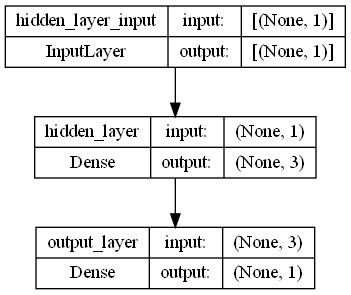

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

# Visualizing our model predictions
* To visualize our model predictions , it's a good idea to plot them against the ground truth.
* Often you see it 'y_predict' vs 'y_test'(ground reality).

In [32]:
#Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 170ms/step


array([[53.47648 ],
       [55.228848],
       [56.981205],
       [58.73357 ],
       [60.485935],
       [62.238293],
       [63.99066 ],
       [65.74302 ],
       [67.495384],
       [69.24774 ],
       [71.000114],
       [72.75247 ],
       [74.50483 ],
       [76.257195],
       [78.00956 ],
       [79.76192 ],
       [81.51428 ],
       [83.266655],
       [85.01901 ],
       [86.77137 ]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,
        89,  91,  93,  95,  97,  99, 101])>

In [38]:
# Let's Create a plotting function
def plot_predictions(
    train_data=X_train,
    train_label=y_train,
    test_data=X_test,
    test_label=y_test,
    predictions=y_pred):
    """
    Plots training data,test data and compare predictions to ground truth tabels.
    """
    plt.figure(figsize=(10,7))
    #plotting training data in blue
    plt.scatter(train_data,train_label,c="b",label="Training data")
    #plotting testing data in red
    plt.scatter(test_data,test_label,c="r",label="Testing data")
    #plotting prediction data in green
    plt.scatter(test_data,predictions,c="g",label="Predictions")
    #show the legend
    plt.legend()

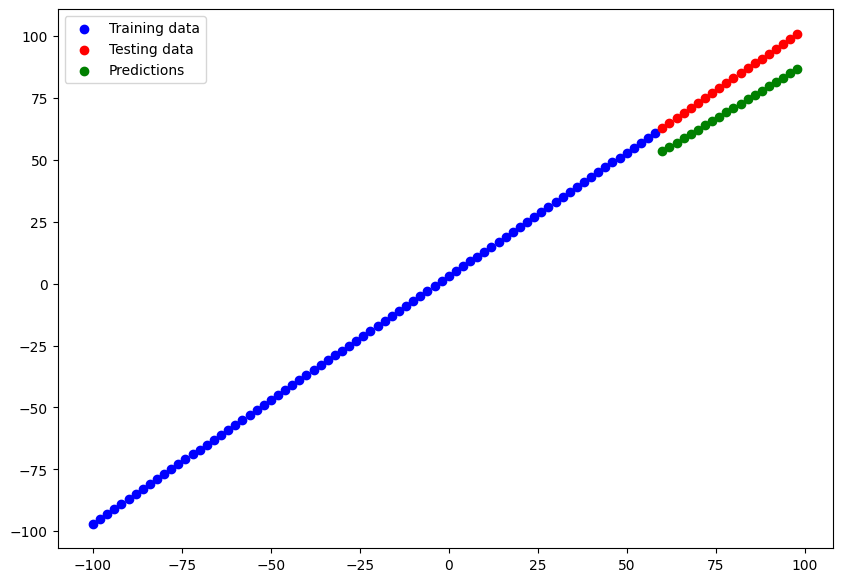

In [39]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

* Evaluating our predictions with regression evaluaton metrics

In [40]:
 # Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 382ms/step - loss: 11.8761 - mae: 11.8761


[11.876072883605957, 11.876072883605957]

In [42]:
y_test,y_pred

(<tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([ 63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,
         89,  91,  93,  95,  97,  99, 101])>,
 array([[53.47648 ],
        [55.228848],
        [56.981205],
        [58.73357 ],
        [60.485935],
        [62.238293],
        [63.99066 ],
        [65.74302 ],
        [67.495384],
        [69.24774 ],
        [71.000114],
        [72.75247 ],
        [74.50483 ],
        [76.257195],
        [78.00956 ],
        [79.76192 ],
        [81.51428 ],
        [83.266655],
        [85.01901 ],
        [86.77137 ]], dtype=float32))

In [45]:
y_pred=tf.constant(y_pred)

In [46]:
y_pred

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[53.47648 ],
       [55.228848],
       [56.981205],
       [58.73357 ],
       [60.485935],
       [62.238293],
       [63.99066 ],
       [65.74302 ],
       [67.495384],
       [69.24774 ],
       [71.000114],
       [72.75247 ],
       [74.50483 ],
       [76.257195],
       [78.00956 ],
       [79.76192 ],
       [81.51428 ],
       [83.266655],
       [85.01901 ],
       [86.77137 ]], dtype=float32)>

In [48]:
y_pred=tf.squeeze(y_pred)

In [50]:
#Calculating the mean absolute error
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=11.876073>

In [51]:
#Calculating the mean squared error
tf.metrics.mean_squared_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=143.08012>

In [52]:
#Let's Create different models and experiment in order to reduce the error

#Model_1

#1. Create model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compiling model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fitting the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 48.8358 - mae: 48.8358
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 9.2782 - mae: 9.2782
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 9.4715 - mae: 9.4715
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 8.9206 - mae: 8.9206
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 9.9230 - mae: 9.9230
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 8.0761 - mae: 8.0761
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 9.8688 - mae: 9.8688
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 10.1032 - mae: 10.1032
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 8.5867 - mae: 8.5867
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 10.4295 - mae: 10.4295
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 8

In [53]:
y_pred_1=model_1.predict(X_test)

1/1 [==============================] - 0s 52ms/step


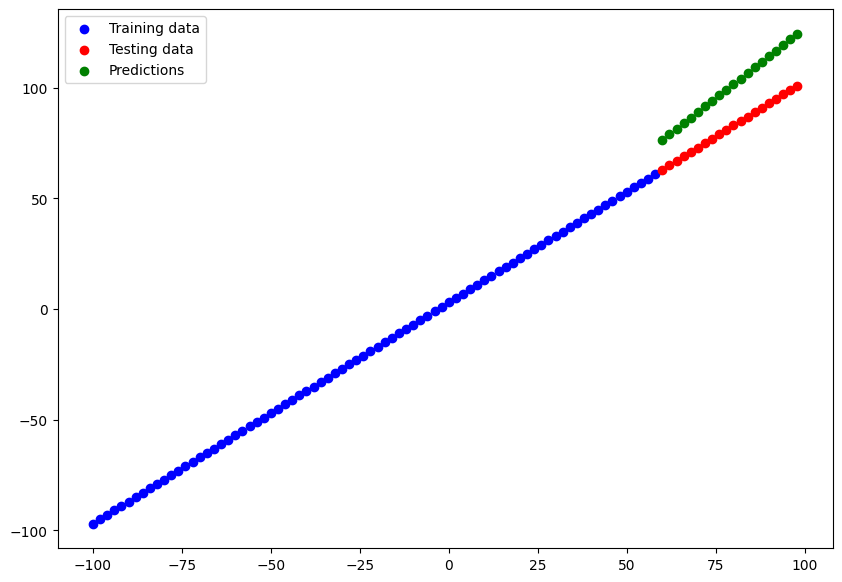

In [54]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_1)

In [56]:
# Mean absolute error
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_1))

<tf.Tensor: shape=(), dtype=float32, numpy=18.403381>

In [57]:
# Mean squared error
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_1))

<tf.Tensor: shape=(), dtype=float32, numpy=347.9029>

In [58]:
# Model_2

#1. Create model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fitting the model
model_2.fit(tf.expand_dims(X_test,axis=-1),y_test,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 352ms/step - loss: 92.0323 - mae: 92.0323
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 47.1861 - mae: 47.1861
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 83.4168 - mae: 83.4168
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 63.7470 - mae: 63.7470
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 22.9594 - mae: 22.9594
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 107.1512 - mae: 107.1512
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 73.6448 - mae: 73.6448
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 55.2612 - mae: 55.2612
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 3.6236 - mae: 3.6236
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 78.1980 - mae: 78.1980
Epoch 11/500
1/1 [==============================] - 0s 5m

In [59]:
y_pred_2=model_2.predict(X_test)

1/1 [==============================] - 0s 61ms/step


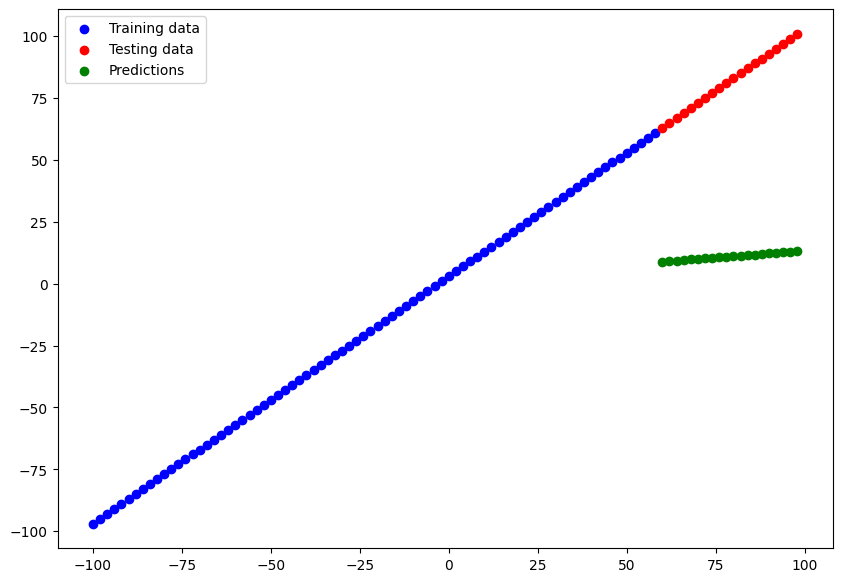

In [60]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_2)

In [61]:
#Mean absolute error
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=70.9845>

In [62]:
#Mean squared error
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=5143.9873>

In [63]:
#Model 3

#1. Create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

#3. Fitting the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 42.4034 - mae: 42.4034
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 38.7495 - mae: 38.7495
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 35.5605 - mae: 35.5605
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 31.7980 - mae: 31.7980
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 27.7454 - mae: 27.7454
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 22.7406 - mae: 22.7406
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 16.6960 - mae: 16.6960
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 9.5483 - mae: 9.5483
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 7.7363 - mae: 7.7363
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 3.3666 - mae: 3.3666
Epoch 11/100
3/3 [==============================] - 0s 3ms/step -

In [64]:
y_pred_3=model_3.predict(X_test)

1/1 [==============================] - 0s 78ms/step


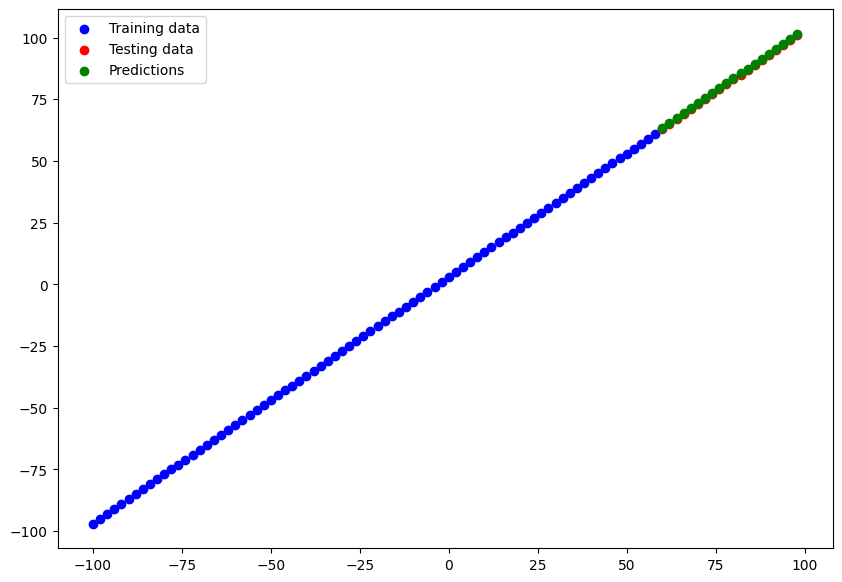

In [65]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_3)

In [66]:
#Mean absolute error
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_3))

<tf.Tensor: shape=(), dtype=float32, numpy=0.4045391>

In [67]:
#Mean squared error
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_3))

<tf.Tensor: shape=(), dtype=float32, numpy=0.16807282>

#Tracking your experiments
* One really good habit in machine learning modelling is to track the results of your experiments 
* And when doing so , it can be tedious if you are running lots of experiments
* Luckily , there are tools to help us!


* TensorBoard->a component of the tensorflow libraby to help track modelling experiments 
* Weights & Biases->a tool for tracking all of kinds of machine learning experiments (Plugs straight into TensorBoard)

# Saving the Model

* Saving a model allow us to use the model outside the jupyter Notebook

In [68]:
# Save the mdoel using SaveModel formate
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [69]:
# Save the model HDF5 format
model_3.save("best_model_HDF5_format.h5")

In [70]:
# Loading in a saved model
loaded_savedmodel_format=tf.keras.models.load_model("best_model_SavedModel_format")
loaded_savedmodel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 10        
                                                                 
 dense_13 (Dense)            (None, 10)                60        
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 10        
                                                                 
 dense_13 (Dense)            (None, 10)                60        
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
